<a href="https://colab.research.google.com/github/nano-rayhan/Machine-Learning-with-Phitron/blob/main/XGBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## XGB classifier

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier

In [5]:
df = pd.read_csv('/content/sample_data/loan_data.csv')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
df.nunique()


,0
person_age,60
person_gender,2
person_education,5
person_income,33989
person_emp_exp,63
person_home_ownership,4
loan_amnt,4483
loan_intent,6
loan_int_rate,1302
loan_percent_income,64


In [7]:
df['person_gender'] =df['person_gender'].map({'male':0, 'female':1})
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes':1, 'No':0})
df.head(1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,1,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,0,1


In [8]:
df = pd.get_dummies(df, columns=['person_education','person_home_ownership','loan_intent'], drop_first=True, dtype=int)
df.head()

,person_age,person_gender,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,...,person_education_High School,person_education_Master,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,1,71948.0,0,35000.0,16.02,0.49,3.0,561,0,...,0,1,0,0,1,0,0,0,1,0
1,21.0,1,12282.0,0,1000.0,11.14,0.08,2.0,504,1,...,1,0,0,1,0,1,0,0,0,0
2,25.0,1,12438.0,3,5500.0,12.87,0.44,3.0,635,0,...,1,0,0,0,0,0,0,1,0,0
3,23.0,1,79753.0,0,35000.0,15.23,0.44,2.0,675,0,...,0,0,0,0,1,0,0,1,0,0
4,24.0,0,66135.0,1,35000.0,14.27,0.53,4.0,586,0,...,0,1,0,0,1,0,0,1,0,0


In [9]:
X = df.drop(columns='loan_status')
y = df['loan_status']

X_train, X_test , y_train, y_test = train_test_split(
    X, y,
    test_size=.25,
    stratify=y,
    random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((33750, 22), (11250, 22), (33750,), (11250,))

## Train model XGBoost

In [10]:
xgbc = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgbc.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

## Predict

In [11]:
y_pred = xgbc.predict(X_test)
y_prob = xgbc.predict_proba(X_test)[:,1]

## Evaluation Metrics

In [12]:
print('Accuracy : ', accuracy_score(y_test, y_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, y_pred))
print('Classification Report : \n', classification_report(y_test, y_pred))

Accuracy :  0.9216888888888889
Confusion Matrix : 
 [[8469  281]
 [ 600 1900]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8750
           1       0.87      0.76      0.81      2500

    accuracy                           0.92     11250
   macro avg       0.90      0.86      0.88     11250
weighted avg       0.92      0.92      0.92     11250



## Early stoping (Overfitting Control)

In [19]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    'objective': 'binary:logistic',
    'eval_metric' :'logloss',
    'max_depth' : 3,
    'eta' : .05,
    'subsample':.8,
    'colsample_bytree':.8,
    'seed':42
}

model = xgb.train(
    params = params,
    dtrain = dtrain,
    num_boost_round = 1000,
    evals = [(dtest, 'eval')],
    early_stopping_rounds = 20
)

[0]	eval-logloss:0.51307
[1]	eval-logloss:0.48849
[2]	eval-logloss:0.46934
[3]	eval-logloss:0.45038
[4]	eval-logloss:0.43665
[5]	eval-logloss:0.42299
[6]	eval-logloss:0.40900
[7]	eval-logloss:0.39880
[8]	eval-logloss:0.38705
[9]	eval-logloss:0.37629
[10]	eval-logloss:0.36723
[11]	eval-logloss:0.35781
[12]	eval-logloss:0.34981
[13]	eval-logloss:0.34178
[14]	eval-logloss:0.33434
[15]	eval-logloss:0.32748
[16]	eval-logloss:0.32110
[17]	eval-logloss:0.31544
[18]	eval-logloss:0.30998
[19]	eval-logloss:0.30522
[20]	eval-logloss:0.29985
[21]	eval-logloss:0.29507
[22]	eval-logloss:0.29078
[23]	eval-logloss:0.28700
[24]	eval-logloss:0.28284
[25]	eval-logloss:0.27885
[26]	eval-logloss:0.27567
[27]	eval-logloss:0.27184
[28]	eval-logloss:0.26841
[29]	eval-logloss:0.26605
[30]	eval-logloss:0.26303
[31]	eval-logloss:0.26021
[32]	eval-logloss:0.25793
[33]	eval-logloss:0.25535
[34]	eval-logloss:0.25280
[35]	eval-logloss:0.25039
[36]	eval-logloss:0.24820
[37]	eval-logloss:0.24591
[38]	eval-logloss:0.24

In [20]:
y_prob = model.predict(dtest)

y_pred = (y_prob >= .5).astype(int)

print('Accuracy :' , accuracy_score(y_test, y_pred))

Accuracy : 0.9334222222222223


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      8750
           1       0.90      0.79      0.84      2500

    accuracy                           0.93     11250
   macro avg       0.92      0.88      0.90     11250
weighted avg       0.93      0.93      0.93     11250



In [22]:
print('Early stopping information:')
print('Best Iteration:', model.best_iteration)
print('Best score [logloss]:', model.best_score)

Early stopping information:
Best Iteration: 999
Best score [logloss]: 0.15096155882896956


## Feature Importance

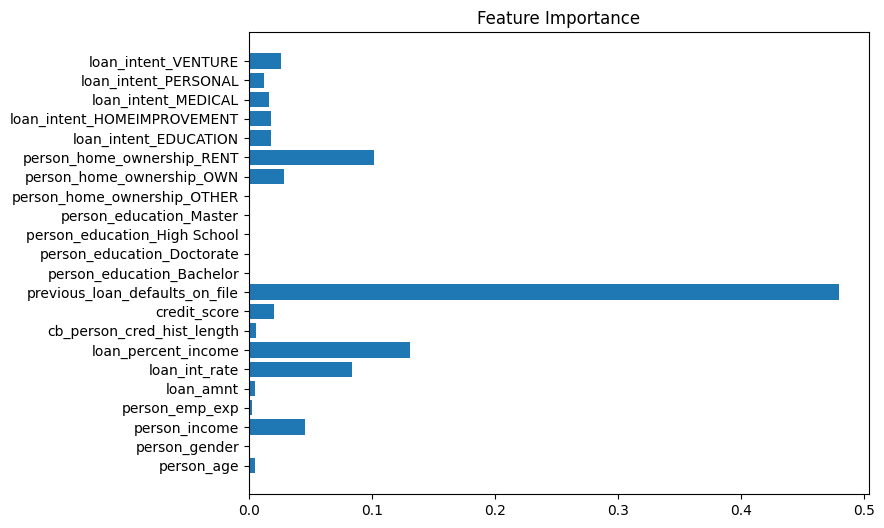

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(X.columns , xgbc.feature_importances_)
plt.title('Feature Importance')
plt.show()

## Hyperparameter Tuning with GridSearchCV

In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators':[50,100, 200],
    'max_depth':[1,3,5,7],
    'learning_rate':[.05, .1, .3],
    'subsample':[.8, 1.0]
}

xgb_base = XGBClassifier(
    objective = 'binary:logistic',
    eval_metric = 'logloss',
    colsample_bytred = .8,
    use_label_encoder = False,
    random_state = 42
)

grid = GridSearchCV(
    estimator= xgb_base,
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [17:39:47] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "colsample_bytred", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytred=0.8,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     i...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [1, 3, 5, 7],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [28]:
print('Best parameter: ', grid.best_params_)
print('Best score: ', grid.best_score_)

Best parameter:  {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best score:  0.9321185185185185
